<a href="https://colab.research.google.com/github/mdietterle/AulasAnalisePreditiva/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados com Python

Primeiramente, precisamos importar algumas bibliotecas que iremos precisar:

As bibliotecas a importar podem depender do tipo de análise que desejamos fazer, e também dos dados que estamos usando.

Em alguns casos algumas bibliotecas podem ser desnecessárias, outras que não estão aqui podem ser importantes.

Você deve analisar caso a caso para importar as bibliotecas que irá usar.

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import math


Vamos carregar um dataset (conjunto de dados) de Preços de casas (dataset americano, então os dados terão nomes um tanto estrnhos).

Este dataset é um dataset muito usado para treimanento e aprendizagem. No início do nosso curso, iremos usar estes datasets mais "comuns" para treinamento, depois iremos usar outros datasets mais próximos da nossa realidade.

Para este primeiro exemplo, iremos usar um dataset de preços de imóveis na cidade de Ames (Iowa - EUA).

Este dataset é usado para casos em que desejamos prever o preço de um imóvel com base em suas características.

No código a seguir, poderemos escolher o dataset de nosso filesystem local.



In [2]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving imdb_top_1000.csv to imdb_top_1000.csv
User uploaded file "imdb_top_1000.csv" with length 438096 bytes


Agora que temos o dataset no colab, precisamos carregar ele "para dentro" do nosso notebook.

A primeira coisa a fazer, é mostrar o tamanho (linhas e colunas) do nosso dataset.


In [3]:
df = pd.read_csv('imdb_top_1000.csv')
df.shape

(1000, 16)

Vamos também mostrar as primeiras linhas do dataset para verificarmos se ele foi corretamente carregado (se não puder mostrar o dataset, ocorreu algum erro).

Você verá que algumas colunas foram omitidas aqui (temos um ... no meio da tabela). Para mostrar todas as colunas, você pode usar o comando:



```
pandas.set_option('display.max_columns', None)
```


In [ ]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Vamos para a primeira operação estatística dos dados.

A ideia é mostrar:
1.  **count** - O total de observações da característica (em conjunto com o shape acima, podemos verificar se alguma das observações possui dados ausentes);
2.  **mean** a média dos valores;


In [ ]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


Vamos ver agora quais variáveis do nosso dataset são valores numéricos

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['IMDB_Rating', 'Meta_score', 'No_of_Votes'], dtype='object')

E quais variáveis são categóricas?

In [ ]:
categorical_features = df.select_dtypes(include=[np.object])

categorical_features.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'Gross'],
      dtype='object')

Vamos fazer também o gráfico de correlações

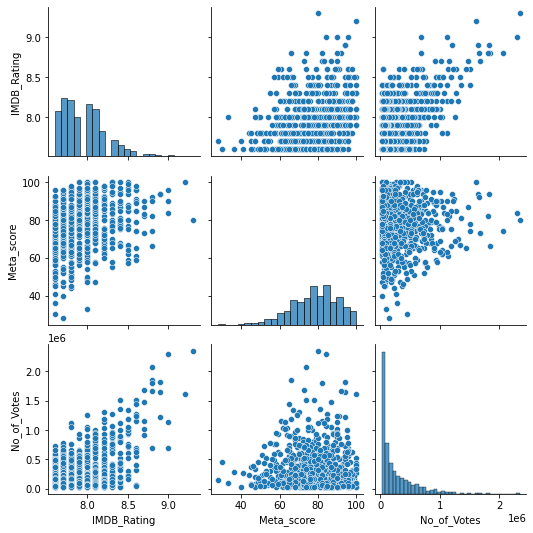

In [ ]:
sns.pairplot(df)

## Ajuste de dados

In [ ]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [ ]:
# 'Apollo 13' está atrapalhando portque tem um 'PG' no seu ano de lançamento (não apareceu como var numérica). I will fix that.
print(df.loc[df['Released_Year']=='PG', 'Series_Title'])

966    Apollo 13
Name: Series_Title, dtype: object


In [ ]:
df.loc[df['Series_Title']=='Apollo 13', 'Released_Year'] = '1995'
df['Released_Year'] = df['Released_Year'].astype('int')
df['Released_Year'].unique()

array([1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2020, 2019, 2014, 1998, 1997, 1995, 1991,
       1977, 1962, 1954, 1946, 2011, 2006, 2000, 1988, 1985, 1968, 1960,
       1942, 1936, 1931, 2018, 2017, 2016, 2012, 2009, 2007, 1984, 1981,
       1979, 1971, 1963, 1964, 1950, 1940, 2013, 2005, 2004, 1992, 1987,
       1986, 1983, 1976, 1973, 1965, 1959, 1958, 1952, 1948, 1944, 1941,
       1927, 1921, 2015, 1996, 1989, 1978, 1961, 1955, 1953, 1925, 1924,
       1982, 1967, 1951, 1949, 1939, 1937, 1934, 1928, 1926, 1920, 1970,
       1969, 1956, 1947, 1945, 1930, 1938, 1935, 1933, 1932, 1922, 1943])

In [9]:
# "RunTime" tem o sufixo ' min' que é desnecessário, vamos remover
df['Runtime'].str.isdigit().sum() # Result is zero, so all contain suffix
df['Runtime'] = df['Runtime'].str.extract('(\d+)', expand=False).astype('int')

In [ ]:
df['Runtime']

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int64

In [10]:
# "Gross" tem vírgulas, devemos remover
df['Gross'] = df['Gross'].str.replace(',','').astype('float')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


Precisamos verificar também a ausência de valores no nosso dataset

Os dados nulos são um complicador para futuramente fazermos a aplicação de métodos de análise de dados.

Iremos ver como tratar estes dados nulos para continuar o uso do dataset.

Vamos substituir os valores nulos da variável GROSS para o valor médio do faturamento dos outros filmes do dataset.

A coluna META_SCORE não é interessante que façamos a substituição pela média, porque é um valor que é dado por votação direta dos espectadores.

A coluna CERTIFICATE também não temos como calcular média ou preencher com um valor 

Utilizamos o método dropna para fazer as alterações, agora vamos entender como funciona

`df.dropna(axis=0, how=’any’, thresh=None, subset=None, inplace=False)`

**axis**: Se for 0 serão ‘dropadas’ as linhas que contem os dados faltantes, caso 1 remove a coluna inteira que tem dados faltantes;

**how**: Determina se a coluna vai ser removida do DataFrame, se passarmos ‘any’ como valor do parâmetro se tiver apenas um valor faltante que seja a coluna é removida, se passarmos ‘all’ precisamos que todos os valores sejam faltantes/nulos para que a coluna seja removida;

**thresh**: com um inteiro, podemos definir o mínimo de colunas de NaN aceitáveis para começar a dropar, ex: caso tenha thresh = 50, precisamos que a coluna tenha mais 50 de valorers faltantes para o método ser aplicado;

**subset**: se estamos removendo linhas, podemos inserir um array de colunas onde o metodo será aplicado;

**inplace**: caso seja True aplica as alterações no dataset de forma automática;

Como estratégia, primeiro faremos as substituições por um outro valor e depois eliminaremos todos os nulos restantes.

In [6]:
# verificando existência de campos nulos
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [13]:
df.update(df['Gross'].fillna(math.floor(df['Gross'].mean())))
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [14]:
df.shape

(787, 16)

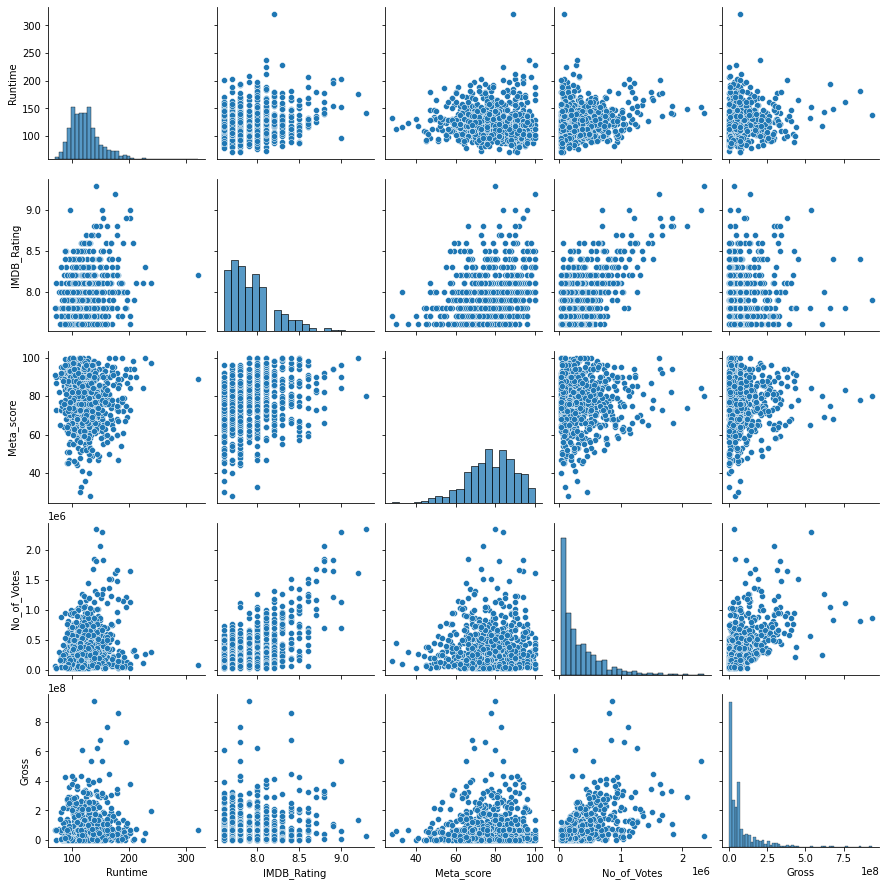

In [15]:
sns.pairplot(df)

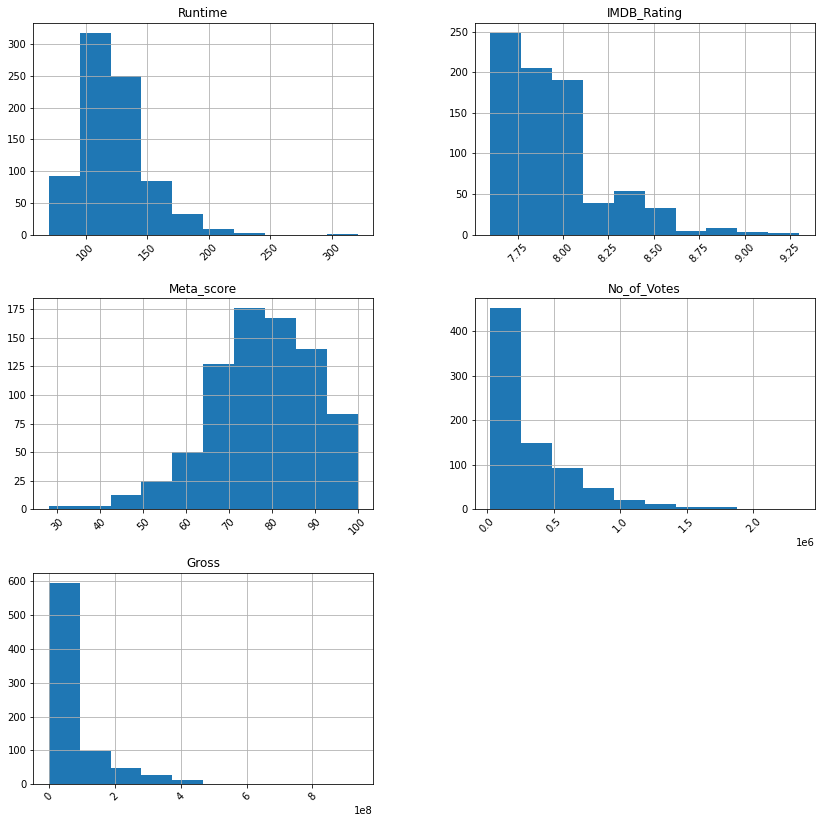

In [16]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

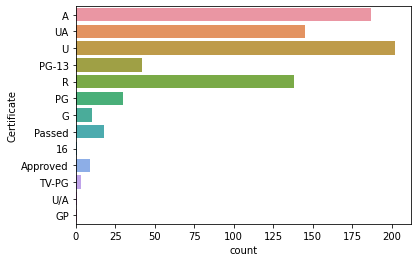

In [17]:
sns.countplot(y='Certificate', data=df)
plt.show()

I am going to chime in with a bit of information about the different certificates here

* "U" = Universal. Used across several systems
* "A" = In the Indian system, this is for 'Adults Only'
* "UA" and "U/A" = Indian equivalent of UK PG. i.e. parental guidance recommended
* "R" = Restricted. In the USA, under 17 requires accompanying parent or adult guardian
* "PG-13" = Parents strongly cautioned – Some material may be inappropriate for children under 13
* "PG" = Parental guidance suggested – Some material may not be suitable for children
* "Passed" = Pre-dates cinema classification. There is no known rating, but was allowed to be released
* "G" = General audiences – All ages admitted. Gonna fold into "U"
* "Approved" = Used interchangably with "Passed" as far as I can tell
* "TV-PG" = Televsion movie rated PG. Fold into "PG"
* "GP" = All ages admitted – Parental guidance suggested. Fold into "PG"
* "TV-14" = Fold into "PG-13"
* "16" = Irish classification. Fold into "R"
* "TV-MA" = Fold into "R"
* "Unrated" = Unrated. I am going to assume this is the same as the NaNs

Eu vou entrar em contato com um pouco de informação sobre os diferentes certificados aqui
* "U" = Universal. Usado em vários sistemas
* "A" = No sistema indiano, isso é para 'Somente para adultos'
* "UA" e "U/A" = equivalente indiano de UK PG. ou seja, orientação dos pais recomendada
* "R" = Restrito. Nos EUA, menores de 17 anos exigem acompanhamento dos pais ou responsável adulto
* "PG-13" = Pais fortemente avisados ​​– Alguns materiais podem ser impróprios para crianças menores de 13 anos
* "PG" = Orientação dos pais sugerida – Alguns materiais podem não ser adequados para crianças
* "Aprovado" = classificação de cinema anterior. Não há classificação conhecida, mas foi autorizado a ser divulgado
* "G" = Público geral – Todas as idades admitidas. Vou dobrar em "U"
* "Aprovado" = Usado alternadamente com "Aprovado" até onde posso dizer
* "TV-PG" = Filme de televisão classificado como PG. Dobre em "PG"
* "GP" = Todas as idades admitidas – Sugestão de orientação parental. Dobre em "PG"
* "TV-14" = Dobre em "PG-13"
* "16" = classificação irlandesa. Dobre em "R"
* "TV-MA" = Dobre em "R"
* "Não classificado" = Não classificado. Eu vou assumir que isso é o mesmo que os NaNs

In [18]:
# Vamos juntar algumas categorias
df.loc[df['Certificate']=='U/A','Certificate'] = 'UA'
df.loc[df['Certificate']=='G','Certificate'] = 'U'
df.loc[df['Certificate']=='Approved', 'Certificate'] = 'Passed'
df.loc[df['Certificate']=='TV-PG', 'Certificate'] = 'PG'
df.loc[df['Certificate']=='GP', 'Certificate'] = 'PG'
df.loc[df['Certificate']=='TV-14', 'Certificate'] = 'PG-13'
df.loc[df['Certificate']=='16', 'Certificate'] = 'R'
df.loc[df['Certificate']=='TV-MA', 'Certificate'] = 'R'

# I am going to assume missing certificate data means movies are unrated
df.loc[df['Certificate'].isna(), 'Certificate'] = 'Unrated'

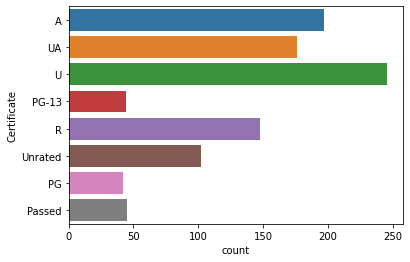

In [ ]:
sns.countplot(y='Certificate', data=df)
plt.show()

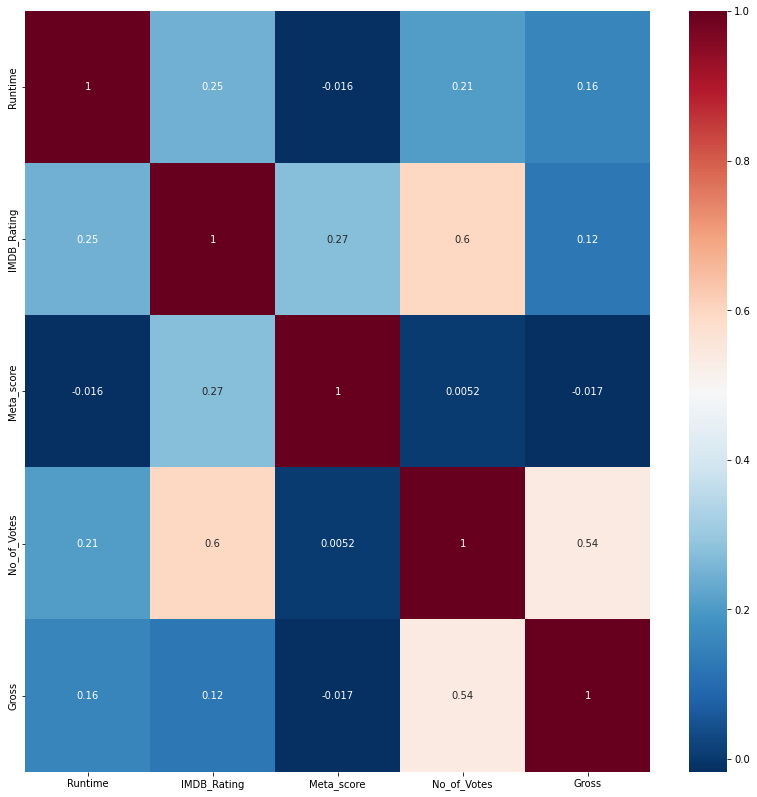

In [19]:
# And now the correlation matrix of the numerical variables
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)
plt.show()

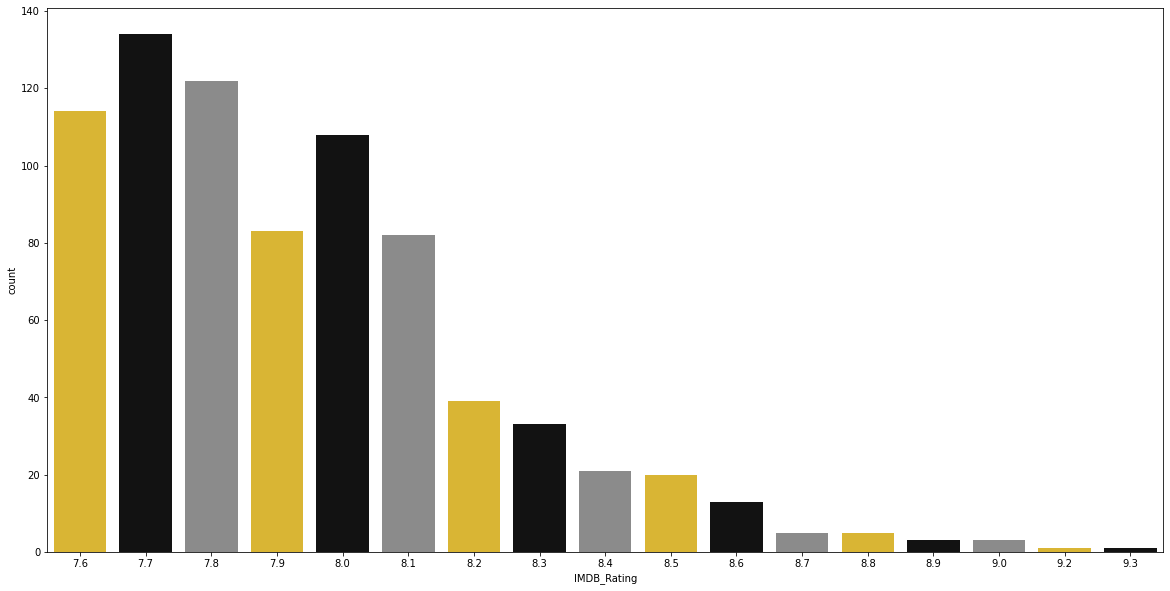

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='IMDB_Rating',palette =['#f5c518', '#121212','#8b8b8b'], data = df)

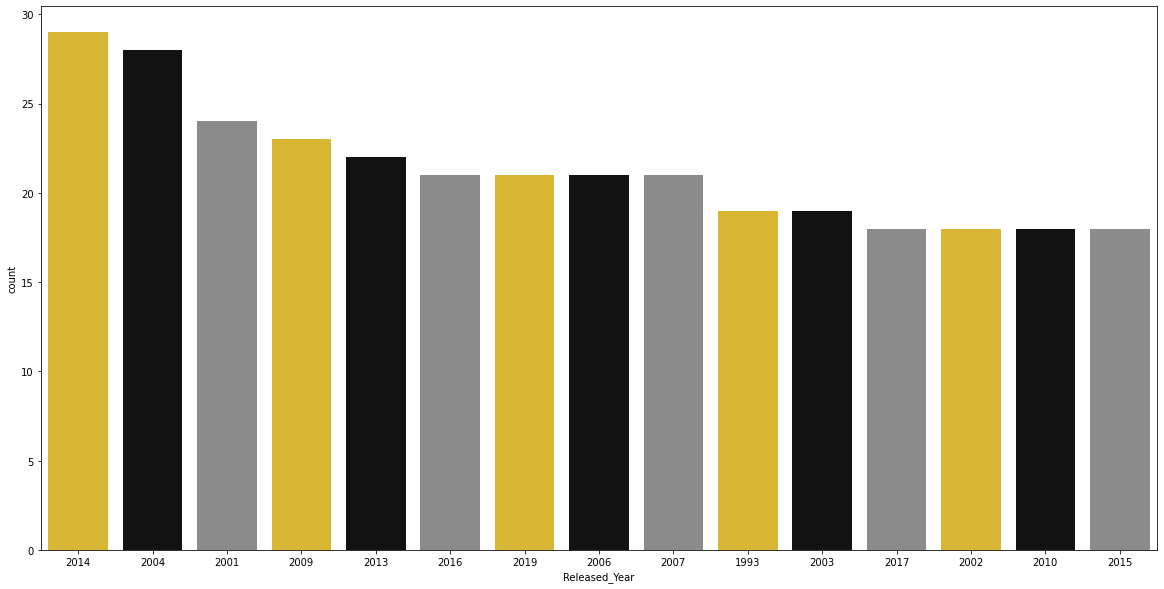

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='Released_Year',data=df,palette =['#f5c518', '#121212','#8b8b8b'], order=df['Released_Year'].value_counts().index[0:15])

In [22]:
df['Genre'].unique()[:5]

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History'],
      dtype=object)

Quando temos mais de um gênero, vamos assumir que o primeiro é o genero principal.

In [23]:
df['genre'] = df['Genre'].apply(lambda text: text.split(',')[0])
df.drop(columns='Genre', inplace=True)
df['genre'].value_counts()

Drama        218
Action       136
Comedy       113
Biography     79
Crime         78
Animation     74
Adventure     64
Horror        10
Mystery        7
Western        4
Film-Noir      2
Family         2
Name: genre, dtype: int64

In [24]:
def add_mean_line(data=df, var='Runtime', **kwargs):
    
    #  If no variable provided skip adding mean line
    if not var: return
    
    #  Calculating mean value for each group
    mean = np.mean(data['Runtime'])
    
    #  Get current axis
    ax = plt.gca()
    
    #  Adding line at group mean
    
    ax.axvline(mean, color='red', lw=3, ls='--', alpha=.7) 
    
    #  Annotate group mean
    x_pos = 0.75
    fontsize = 12
    
    if mean < 120:
        x_pos=.65

    ax.text(x_pos, 0.7, f'média:{mean: .0f}',
            transform = ax.transAxes, 
            color = 'red', fontweight='bold', fontsize=fontsize)

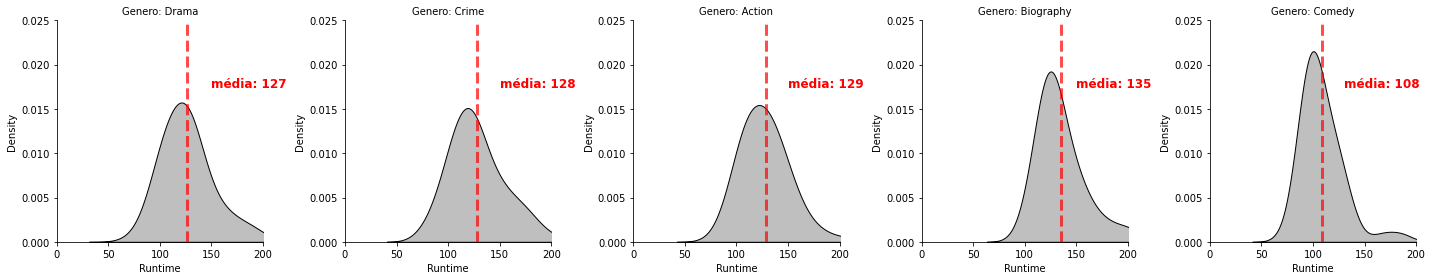

In [25]:
g = sns.FacetGrid(df[df['genre'].isin(['Drama', 'Crime', 'Action', 'Comedy', 'Biography'])], col='genre', height=4,
                 sharex=False, sharey=False, xlim=(0,200), ylim=(0,.025))
g.map(sns.kdeplot, 'Runtime', shade=True, color='black', bw_method=.5)
g.map_dataframe(add_mean_line)
g.set_titles(col_template='Genero: {col_name}');
# There's no big difference in mean runtime over genres

In [26]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111,7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,68034750.0,Drama
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0,Comedy
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,68034750.0,Comedy
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,U,201,7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,68034750.0,Drama
